In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.polynomial.polynomial import Polynomial
import pandas as pd

# dane
years= np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980])
population = np.array([76212168, 92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203302031, 226542199])
m = np.arange(7)

In [2]:
def build_matrix(x, m):
    n = len(x)
    A = np.zeros((n, m+1))
    for i in range(n):
        for j in range(m+1):
            A[i][j] = x[i]**j
    return A

In [4]:
def approx(x, y, m):
    A = build_matrix(x, m)
    c= inv(A.T @ A) @ A.T @ y
    return c

def extrapolate(c,x):
    y = 0
    for i in range(len(c)):
        y += c[i]*x**i
    return y

In [5]:
def relative_error(y, y_hat):
    return np.abs(y - y_hat) / y


In [6]:
def optimize(x, y, m):
    p = approx(x, y, m)
    y_hat = extrapolate(p, 1990)
    return relative_error(248709873, y_hat)

In [21]:
errors = np.array([optimize(years, population, i) for i in m])
df = pd.DataFrame({"stopień": np.arange(7), "błąd względny": np.round(errors*100,2)})
print(df.to_latex())

'\\begin{tabular}{lrr}\n\\toprule\n & stopień & błąd względny \\\\\n\\midrule\n0 & 0 & 42.350000 \\\\\n1 & 1 & 5.190000 \\\\\n2 & 2 & 2.410000 \\\\\n3 & 3 & 352028.620000 \\\\\n4 & 4 & 365559.970000 \\\\\n5 & 5 & 22372803.850000 \\\\\n6 & 6 & 64444823609.599998 \\\\\n\\bottomrule\n\\end{tabular}\n'

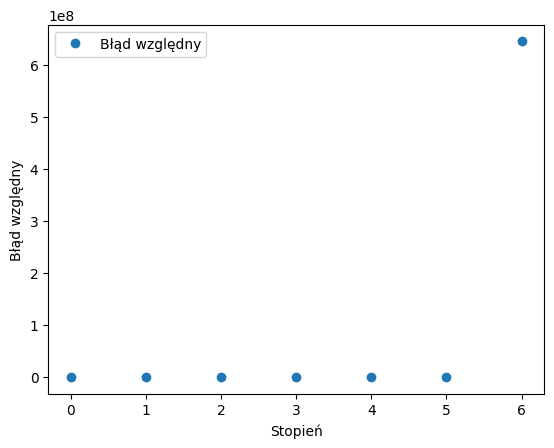

Najlepszy stopień wielomianu: 2
Błąd względny dla najlepszego stopnia wielomianu: 2.41%


In [20]:


plt.plot(m, errors,'o', label='Błąd względny')
plt.xlabel('Stopień')
plt.ylabel('Błąd względny')
plt.legend()
plt.show()
best_m = m[np.argmin(errors)]
print(f'Najlepszy stopień wielomianu: {best_m}')
print(f'Błąd względny dla najlepszego stopnia wielomianu: {round(errors[best_m]*100,2)}%')

In [8]:
# aproksymacja dla najlepszego stopnia wielomianu
p = approx(years, population, best_m)
y_hat = extrapolate(p, 1990)
print(f'Wartość ekstrapolowana dla roku 1990: {y_hat}')


Wartość ekstrapolowana dla roku 1990: 254712944.20092773


In [9]:
# kryterium informacyjne Akaikego
def AIC(y, y_hat, k):
    n = len(y)
    return 2 * k + n * np.log(np.sum((y - y_hat) ** 2) / n)

# funkcja kryterium informacyjnego Akaikego ze składnikiem koregującym

def AICc(y, y_hat, k):
    n = len(y)
    return AIC(y, y_hat, k) + 2 * k * (k + 1) / (n - k - 1)

[318.43954648 285.62790669 274.6533739  277.68347051 283.99038894
 291.0778162  295.18382228]
Najlepszy stopień wielomianu wg AICc: 2
Wartość kryterium informacyjnego Akaikego z korektą dla najlepszego stopnia wielomianu: 274.65337389659015


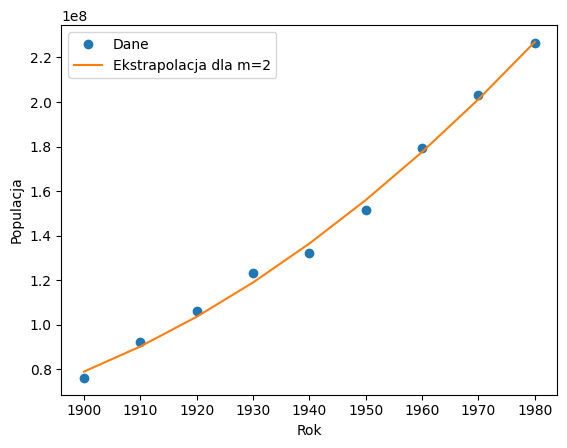

In [10]:
# kryterium informacyjne Akaikego z korektą

aic_c = np.array([AICc(population, extrapolate(approx(years, population, i), years), i) for i in m])
best_aic_c = m[np.argmin(aic_c)]
print(aic_c)
print(f'Najlepszy stopień wielomianu wg AICc: {best_aic_c}')
print(f'Wartość kryterium informacyjnego Akaikego z korektą dla najlepszego stopnia wielomianu: {aic_c[best_aic_c]}')

# wykres

plt.plot(years, population, 'o', label='Dane')
plt.plot(years, extrapolate(p, years), label=f'Ekstrapolacja dla m={best_m}')
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.legend()
plt.show()